In [6]:
# ADJUST THIS FOR YOUR MACHINE
plot_directory_path = "plots"  # Directory for saving plots]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import pickle

plots_dir = pathlib.Path(plot_directory_path)


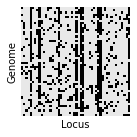

In [8]:
# Random genomes
rng = np.random.default_rng(42)

genomes = np.repeat((rng.random(50) < 0.2).astype(int), 50).reshape(50, 50).T
genomes = np.logical_xor(genomes, rng.random(size=(50, 50)) < 0.15).astype(int)

fig, ax = plt.subplots(figsize=(2, 2))
plt.imshow(genomes, vmin=-0.1, vmax=1, cmap="binary", interpolation="nearest")
ax.set_xlim(-0.5, 50 - 0.5)
ax.set_ylim(-0.5, 50 - 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Locus")
ax.set_ylabel("Genome")
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
fig.savefig(plots_dir / "1-genomes.svg", bbox_inches="tight")

In [1]:
# for MA
phenomap_path = pathlib.Path("assets/1-phenomap_MA.csv")
phenomap = pd.read_csv(phenomap_path, header=None)

data = phenomap.iloc[
    100:150, :50
]  # Take first 50 neut loci that encode for the life history traits because of the phenomap
data[data == 0.95] = 0  # Ignore identity effects

# Main plot
fig, ax = plt.subplots(figsize=(2, 2))
im = plt.imshow(
    data,
    cmap="Reds_r",
    vmin=data.min().min(),
    vmax=data.max().max(),
    interpolation="nearest",
)
plt.xlim(-0.5, 49.5)
plt.ylim(-0.5, 49.5)
plt.xticks([])
plt.yticks([])
plt.xlabel("Age affected")
plt.ylabel("Locus")

# Colorbar
cbar = plt.colorbar(im, fraction=0.0455, pad=0.04)
cbar.ax.set_yticklabels([])
cbar.ax.set_yticks([])
cbar.set_label(
    " detrimental       neutral\n    variant           variant",
    rotation=90,
    size=8,
    labelpad=7,
    ha="left",
    y=0,
)

# Despine
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)

# Save
fig.savefig(plots_dir / "1-MA-map.svg", bbox_inches="tight")

NameError: name 'pathlib' is not defined

/var/folders/f_/qj20ngts6yd02nvb62bl9zp80000gp/T/ipykernel_19878/1117425220.py:29: UserWarning: Use the colorbar set_ticks() method instead.
  cbar.ax.set_yticks([])


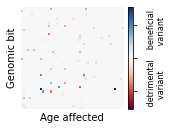

In [11]:
# for AP
phenomap_path = pathlib.Path("assets/1-phenomap_AP.csv")
phenomap = pd.read_csv(phenomap_path, header=None)

data = phenomap.iloc[
    100:150, :50
]  # Take first 50 neut loci that encode for the life history traits because of the phenomap
data[data == 0.95] = 0  # Ignore identity effects

# Main plot
fig, ax = plt.subplots(figsize=(2, 2))
im = plt.imshow(
    data,
    cmap="RdBu",
    vmin=data.min().min() * 0.9,
    vmax=data.max().max() * 0.9,
    interpolation="nearest",
)
plt.xlim(-0.5, 49.5)
plt.ylim(-0.5, 49.5)
plt.xticks([])
plt.yticks([])
plt.xlabel("Age affected")
plt.ylabel("Genomic bit")

# Colorbar
cbar = plt.colorbar(im, fraction=0.0455, pad=0.04)
cbar.ax.set_yticklabels([])
cbar.ax.set_yticks([])
# cbar.set_label("detrimental ... beneficial", rotation=90, size=8, labelpad=7)
cbar.set_label(
    " detrimental    beneficial\n    variant          variant",
    rotation=90,
    size=8,
    labelpad=7,
    ha="left",
    y=0,
)

# Despine
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)

# Save
fig.savefig(plots_dir / "1-AP-map.svg", bbox_inches="tight")
plt.show()

In [2]:
pickle_paths = [
    pathlib.Path("assets/1-pickle_MA"),
    pathlib.Path("assets/1-pickle_AP"),
]

rng = np.random.default_rng(42)

for pickle_path in pickle_paths:

    with open(pickle_path, "rb") as file_:
        pickle_ = pickle.load(file_)

    phenokind = "MA" if "MA" in str(pickle_path) else "AP"

    fig, ax = plt.subplots(figsize=(2, 2))
    phenos = pickle_.phenotypes.copy().reshape(
        pickle_.genomes.shape[0], pickle_.genomes.shape[2]
    )
    phenos[:, 0] = 1

    noise = rng.random(size=[50, 50]) * 0.01
    mask = rng.random(size=noise.shape) < 0.5
    noise[mask] = 0
    phenosplot = (phenos[:50, :50] - noise) ** 1.6

    vmin = 0.8 if phenokind == "AP" else 0.82
    vmax = 0.97 if phenokind == "AP" else 0.92

    im = plt.imshow(
        phenosplot, cmap="YlOrBr_r", vmin=vmin, vmax=vmax, interpolation="nearest"
    )
    plt.xlim(-0.5, 49.5)
    plt.ylim(-0.5, 49.5)
    plt.xticks([])
    plt.yticks([])
    # plt.title("age-dep survival rate")
    plt.xlabel("Age")
    plt.ylabel("Individual")

    # Plot overlay
    plt.plot(50 * 0.9 ** np.arange(50), c="black", alpha=1, lw=2, ls="--")
    ax.text(15, 15, "?", size=30)

    # Colorbar
    cbar = plt.colorbar(im, fraction=0.0455, pad=0.04)
    cbar.ax.set_yticklabels([])
    cbar.ax.set_yticks([])
    # cbar.set_label("low ... high", rotation=90, size=8, labelpad=7)
    cbar.set_label(
        "      low                 high\n  survival           survival",
        rotation=90,
        size=8,
        labelpad=7,
        ha="left",
        y=0,
    )

    # Despine
    ax.spines.right.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)

    fig.savefig(plots_dir / f"1-{phenokind}-pheno.svg", bbox_inches="tight")

NameError: name 'pathlib' is not defined